In [34]:
# ---------------------------------------------------
# Patrick Heng
# 22 Feb 2025
# Function to calculate van Laar model coefficients
# given binary composition and vapor pressure data.
# ---------------------------------------------------

# CODE NOT WORKING !!!

# Functions to calculate activity coefficients
def gamma_1(A12,A21,x1,x2): return np.exp(A12*(A21*x2/(A12*x1+A21*x2))**2)
def gamma_2(A12,A21,x1,x2): return np.exp(A21*(A12*x1/(A12*x1+A21*x2))**2)


def p_sat(T,A,B,C): return np.exp(A-B/(T+C))


def van_laar_fit_1(x1_data,y1_data,p1_sat,P):
    from scipy.optimize import curve_fit
    
    RHS_data = y1_data*P/p1_sat
    
    # Create a function in x_1 for curve fitting
    fit_eq = lambda x, A12, A21: gamma_1(A12,A21,x,1-x)*x
    
    # Get fit 
    params, p_cov = curve_fit(fit_eq, x1_data, RHS_data)
    
    return params, p_cov

def van_laar_fit_2(x1_data,y1_data,p1_sat,P):
    from scipy.optimize import curve_fit
    
    RHS_data = y1_data*P/p1_sat
    
    # Create a function in x_1 for curve fitting
    fit_eq = lambda x, A12, A21: gamma_2(A12,A21,x,1-x)*x
    
    # Get fit 
    params, p_cov = curve_fit(fit_eq, x1_data, RHS_data)
    
    return params, p_cov

def eq_line(x,P,p1_sat,p2_sat,A12,A21,T0=100):
    
    x2 = 1 - x 
    g1 = gamma_1(A12,A21,x,x2)
    g2 = gamma_2(A12,A21,x,x2)

    
    T = np.zeros([len(x)+1,1])
    y = np.zeros([len(x),1])
    T[0] = T0
        
    for i in range(len(x)):
    
        f = lambda T: P - g1[i]*x[i]*p1_sat(T) - g2[i]*x2[i]*p2_sat(T)

        sol = root_scalar(f,x0=T[i])
        T[i+1] = sol.root

        y[i] = g1[i]*x[i]*p1_sat(T[i+1])/P
    
    return y, T[1:]
        

,T [K],x,y
0,390.88,0.000,0.000
1,384.10,0.050,0.253
2,380.00,0.092,0.388
3,379.60,0.097,0.402
4,374.00,0.181,0.556
5,369.80,0.291,0.660
6,369.50,0.303,0.666
7,367.20,0.417,0.724
8,366.20,0.546,0.750
9,366.20,0.550,0.753


[44.63164873 -2.24802074]


C:\Users\pheng\AppData\Local\Temp\ipykernel_33472\2064513501.py:9: RuntimeWarning: overflow encountered in exp
  def gamma_1(A12,A21,x1,x2): return np.exp(A12*(A21*x2/(A12*x1+A21*x2))**2)
C:\Users\pheng\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


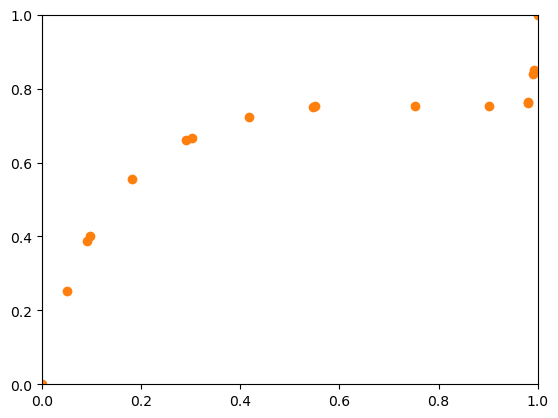

In [35]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

df = pd.read_csv('CHEN 3100 - HW 9 - W-nB Binary Data.csv')

[A1,B1,C1] = [13.7819,2726.81,217.572]
[A2,B2,C2] = [13.9320,3056.96,217.625]

p1 = lambda T: p_sat(T,A1,B1,C1)
p2 = lambda T: p_sat(T,A2,B2,C2)


display(df)

x_1 = np.array(df['x'])
y_1 = np.array(df['y'])
T_1 = np.array(df['T [K]'])
p1_sat = p1(T_1)
p2_sat = p2(T_1)

#p1_sat = np.array(df['kPa'])     # Bad header name, fix for next time
#p2_sat = np.array(df['kPa.1'])

P = 99.2985 # kPa

params_1, pcov_1 = van_laar_fit_1(x_1,y_1,p1_sat,P)
params_2, pcov_2 = van_laar_fit_2(1-x_1,1-y_1,p2_sat,P)

params = 0.5*(params_1 + params_2)

print(params)

x = np.linspace(0,1,100)

A12 = params[0]
A21 = params[1]

T0 = 80

y,T = eq_line(x,P,p1,p2,A12,A21,T0);

plt.plot(x,y)
plt.plot(x_1,y_1,linestyle='none',marker='o')
plt.xlim([0,1])
plt.ylim([0,1])

plt.show()
